### Name: Jiten Sidhpura 
### UID: 2018130051
### Batch B
### BE COMPS

### Objective: To carry out linear regression (including multiple regression) and build a regression model using Python Platform

## Imports

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

## Reading Data

In [68]:
filename = 'auto-mpg.csv'

dataset = pd.read_csv(filename)

dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [69]:
dataset.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

## Drop Duplicates If Present

In [70]:
dataset = dataset.drop_duplicates()

In [71]:
dataset.skew()

C:\Users\jiten\AppData\Local\Temp/ipykernel_7408/4231230252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew()


mpg             0.457066
cylinders       0.526922
displacement    0.719645
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64

<AxesSubplot:>

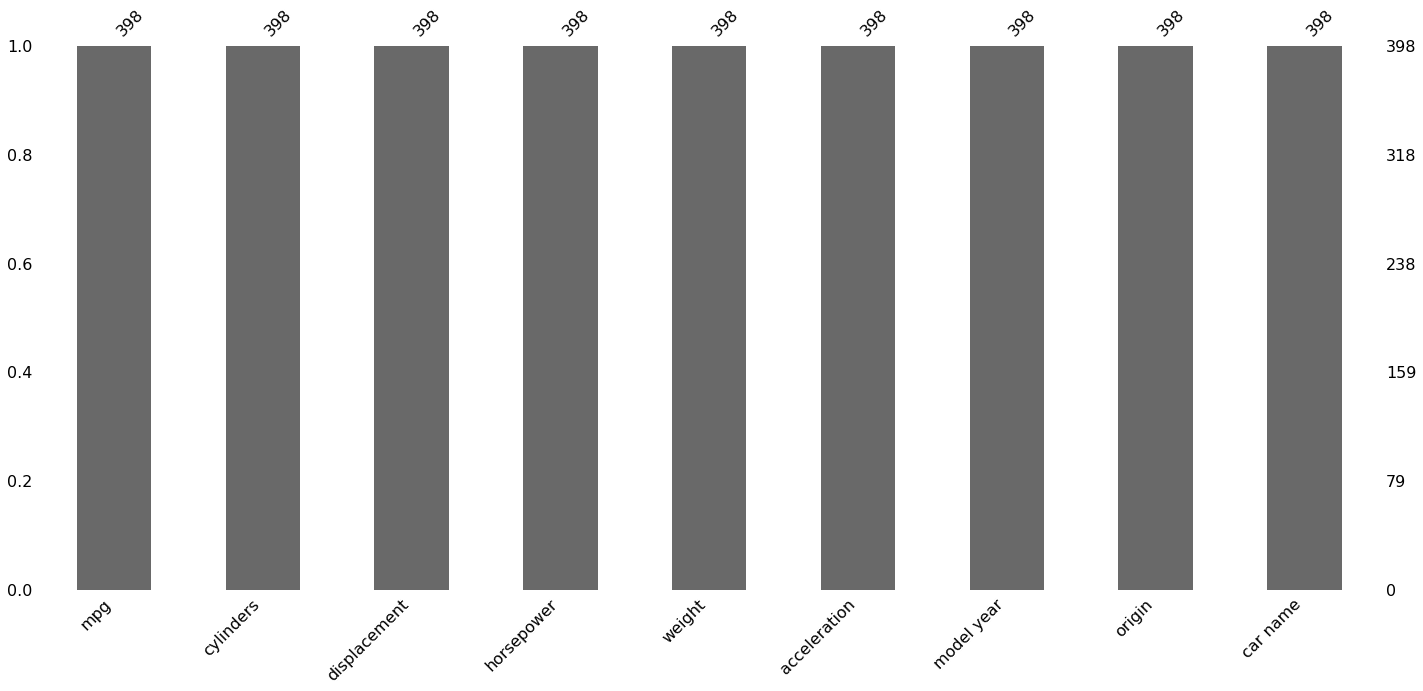

In [72]:
import missingno
missingno.bar(dataset)

## No Missing Data

In [73]:
from scipy.special import boxcox, inv_boxcox

def check_distribution(col):
    print('Before Boxcox Transformation ==> ', dataset[col].skew())
    sns.distplot(dataset[col])
    plt.show()
    
def apply_boxcox_transformation(col, x):
#     print('Before Boxcox Transformation ==> ', dataset[col].skew())
#     sns.distplot(dataset[col])
#     plt.show()
    
    check_distribution(col)
    
    transformed_values = boxcox(dataset[col], x)
    print('After Boxcox Transformation ==> ', transformed_values.skew())
    sns.distplot(transformed_values)
    plt.show()

## mpg Feature

Before Boxcox Transformation ==>  0.45706634399491913


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


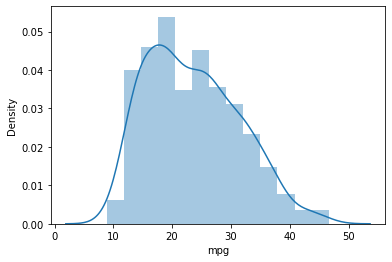

In [74]:
check_distribution('mpg')

### Target Feature has some order of skewness
### Let's apply feature scaling to reduce skewness

Before Boxcox Transformation ==>  0.45706634399491913


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


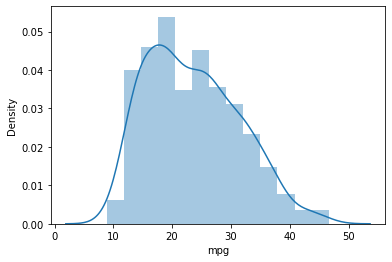

After Boxcox Transformation ==>  0.012493881028852285


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


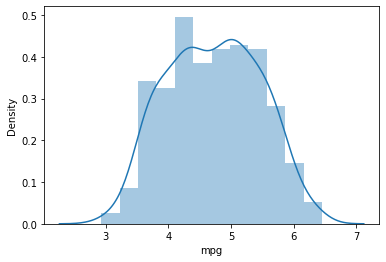

In [75]:
mpg_boxcox_value = 0.25

apply_boxcox_transformation('mpg', mpg_boxcox_value)

### Now the distribution of the mpg feature is very less skewed

In [76]:
dataset['Transformed_mpg'] = boxcox(dataset['mpg'], mpg_boxcox_value)

In [77]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Transformed_mpg
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,4.239069
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,3.871959
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,4.239069
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,4.000000
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,4.122173


## cylinders Feature

<AxesSubplot:xlabel='cylinders', ylabel='count'>

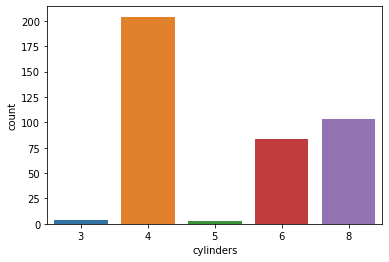

In [78]:
sns.countplot(x='cylinders', data=dataset)

### Cylinders ==> 4 is significantly very high
### Even No of cylinders are significantly high
### Odd No of cylinders are significantly less

In [79]:
dataset['isCylindersEven'] = dataset['cylinders'].map(lambda x: 1 if x % 2 == 0 else 0)
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Transformed_mpg,isCylindersEven
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,4.239069,1
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,3.871959,1
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,4.239069,1
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,4.000000,1
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,4.122173,1


<AxesSubplot:xlabel='isCylindersEven', ylabel='count'>

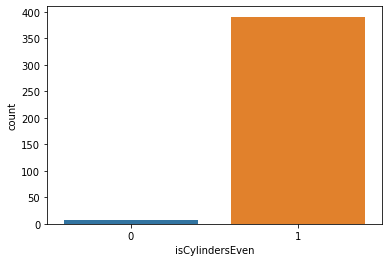

In [80]:
sns.countplot(x='isCylindersEven', data=dataset)

In [81]:
len(dataset[dataset['isCylindersEven'] == 1]) / len(dataset)

0.9824120603015075

### No of Cylinders being odd  is very very less compared to even

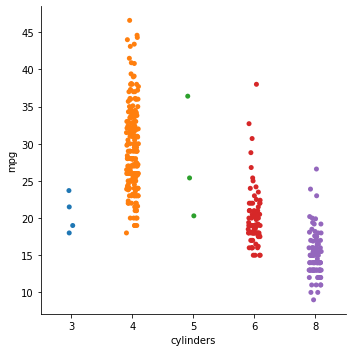

In [82]:
sns.catplot(x='cylinders', y='mpg', data=dataset)

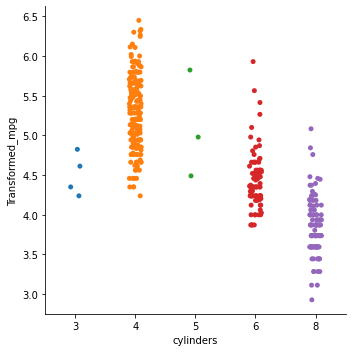

In [83]:
sns.catplot(x='cylinders', y='Transformed_mpg', data=dataset)

## Get Mean and Median of the dataset for unique values of cylinders attribute

In [84]:
dataset.groupby(['cylinders']).mean()

,mpg,displacement,weight,acceleration,model year,origin,Transformed_mpg,isCylindersEven
cylinders,,,,,,,,
3,20.550000,72.500000,2398.500000,13.250000,75.500000,3.000000,4.507304,0.0
4,29.286765,109.796569,2308.127451,16.601471,77.073529,1.985294,5.272937,1.0
5,27.366667,145.000000,3103.333333,18.633333,79.000000,2.000000,5.098471,0.0
6,19.985714,218.142857,3198.226190,16.263095,75.928571,1.190476,4.433120,1.0
8,14.963107,345.009709,4114.718447,12.955340,73.902913,1.000000,3.842645,1.0


In [85]:
dataset.groupby(['cylinders']).median()

,mpg,displacement,weight,acceleration,model year,origin,Transformed_mpg,isCylindersEven
cylinders,,,,,,,,
3,20.25,70.0,2375.0,13.5,75.0,3.0,4.482246,0.0
4,28.25,105.0,2232.0,16.2,78.0,2.0,5.221752,1.0
5,25.40,131.0,2950.0,19.9,79.0,2.0,4.979836,0.0
6,19.00,228.0,3201.5,16.1,76.0,1.0,4.351191,1.0
8,14.00,350.0,4140.0,13.0,73.0,1.0,3.737346,1.0


### From above we can confirm that when cylinders == 4 then mpg is highest

In [86]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Transformed_mpg,isCylindersEven
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,4.239069,1
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,3.871959,1
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,4.239069,1
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,4.000000,1
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,4.122173,1


## displacement Feature

Before Boxcox Transformation ==>  0.7196451643005952


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


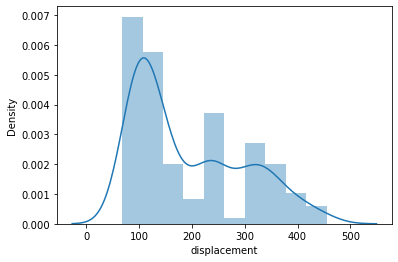

In [87]:
check_distribution('displacement')

<AxesSubplot:xlabel='displacement', ylabel='Transformed_mpg'>

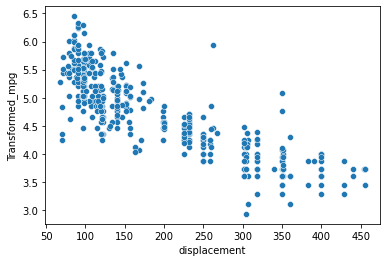

In [88]:
sns.scatterplot(x='displacement', y='Transformed_mpg', data=dataset)

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

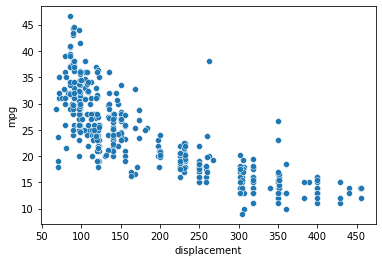

In [89]:
sns.scatterplot(x='displacement', y='mpg', data=dataset)

### From above we can see displacement and mpg are inversely related 

### Let's reduce skewness in displacement and see the scatter plots again

Before Boxcox Transformation ==>  0.7196451643005952


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


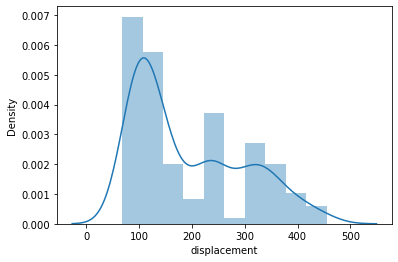

After Boxcox Transformation ==>  0.07949667041690228


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


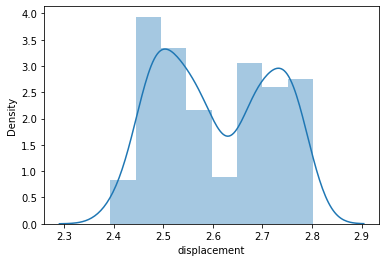

In [90]:
displacement_boxcox_value = -0.3

apply_boxcox_transformation('displacement', displacement_boxcox_value)

### Applying boxcox to reduce skewness in displacement feature

In [91]:
dataset['Transformed_displacement'] = boxcox(dataset['displacement'], displacement_boxcox_value)

<AxesSubplot:xlabel='Transformed_displacement', ylabel='mpg'>

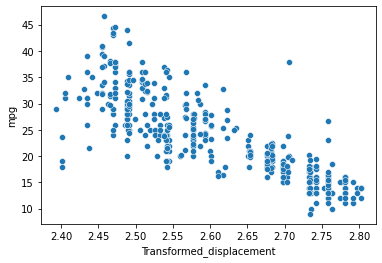

In [92]:
sns.scatterplot(x='Transformed_displacement', y='mpg', data=dataset)

<AxesSubplot:xlabel='Transformed_displacement', ylabel='Transformed_mpg'>

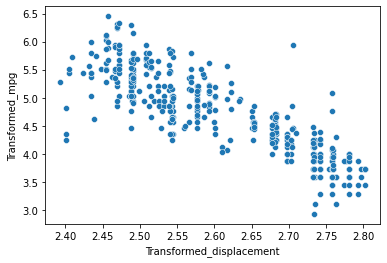

In [93]:
sns.scatterplot(x='Transformed_displacement', y='Transformed_mpg', data=dataset)

### From the scatterplots after fetaure transformation in displacement feature it's relation with mpg has not changed 

In [94]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Transformed_mpg,isCylindersEven,Transformed_displacement
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,4.239069,1,2.735284
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,3.871959,1,2.758346
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,4.239069,1,2.741567
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,4.000000,1,2.733519
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,4.122173,1,2.732330


## horsepowerFeature

In [95]:
dataset['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [96]:
len(dataset[dataset['horsepower'] == '?'])

6

In [97]:
dataset[dataset['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Transformed_mpg,isCylindersEven,Transformed_displacement
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto,4.944272,1,2.490948
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick,4.562781,1,2.653238
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe,6.115581,1,2.454203
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra,4.816333,1,2.576430
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i,5.694262,1,2.496038
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl,4.759755,1,2.593412


### Replace ? with Nan

In [98]:
dataset['horsepower'].replace('?', np.nan, inplace=True)

dataset['horsepower'] = dataset['horsepower'].astype(np.float64)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

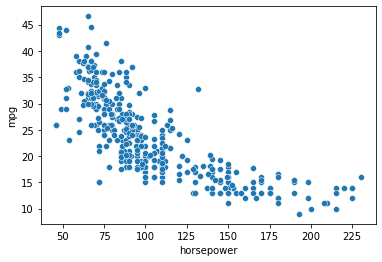

In [99]:
sns.scatterplot(x='horsepower', y='mpg', data=dataset)

<AxesSubplot:xlabel='horsepower', ylabel='Transformed_mpg'>

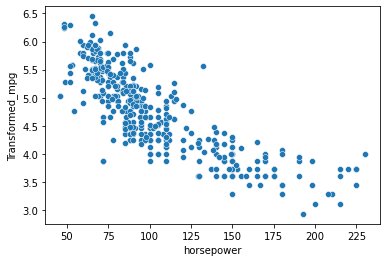

In [100]:
sns.scatterplot(x='horsepower', y='Transformed_mpg', data=dataset)

### mpg decreases exponentially when horsepower rise  

In [101]:
dataset['horsepower'].isna().sum()

6

In [102]:
dataset['Imputed_horsepower'] = dataset['horsepower'].fillna(dataset['horsepower'].median())

<AxesSubplot:xlabel='Imputed_horsepower', ylabel='mpg'>

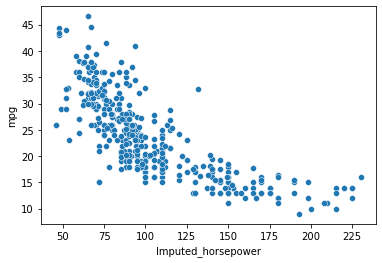

In [103]:
sns.scatterplot(x='Imputed_horsepower', y='mpg', data=dataset)

<AxesSubplot:xlabel='Imputed_horsepower', ylabel='Transformed_mpg'>

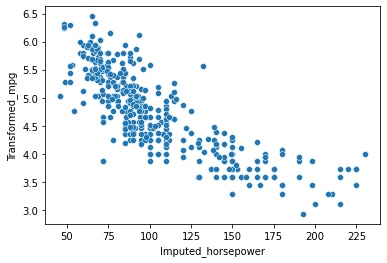

In [104]:
sns.scatterplot(x='Imputed_horsepower', y='Transformed_mpg', data=dataset)

### weight

Before Boxcox Transformation ==>  0.5310625125994629


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


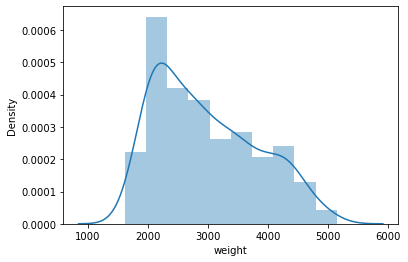

In [105]:
check_distribution('weight')

<AxesSubplot:xlabel='weight', ylabel='mpg'>

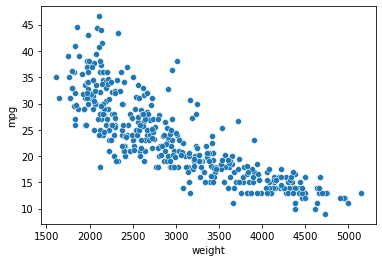

In [106]:
sns.scatterplot(x='weight', y='mpg', data=dataset)

<AxesSubplot:xlabel='weight', ylabel='Transformed_mpg'>

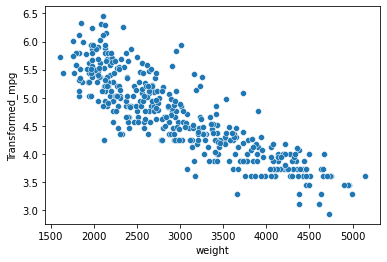

In [107]:
sns.scatterplot(x='weight', y='Transformed_mpg', data=dataset)

### Reduce skewness of the weight feature 

Before Boxcox Transformation ==>  0.5310625125994629


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


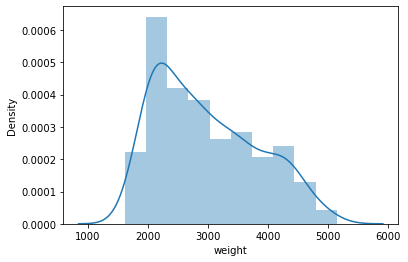

After Boxcox Transformation ==>  0.15630446451103178


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


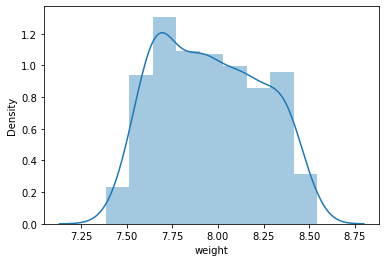

In [108]:
weight_boxcox_value = 0

apply_boxcox_transformation('weight', weight_boxcox_value)

In [109]:
dataset['Transformed_weight'] = boxcox(dataset['weight'], weight_boxcox_value)

dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Transformed_mpg,isCylindersEven,Transformed_displacement,Imputed_horsepower,Transformed_weight
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,4.239069,1,2.735284,130.0,8.161660
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,3.871959,1,2.758346,165.0,8.214194
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,4.239069,1,2.741567,150.0,8.142063
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,4.000000,1,2.733519,150.0,8.141190
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,4.122173,1,2.732330,140.0,8.145840


<AxesSubplot:xlabel='Transformed_weight', ylabel='mpg'>

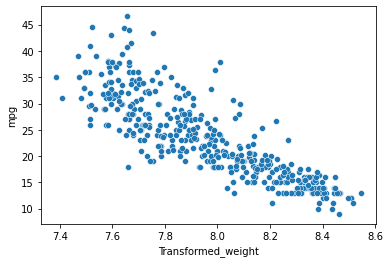

In [110]:
sns.scatterplot(x='Transformed_weight', y='mpg', data=dataset)

<AxesSubplot:xlabel='Transformed_weight', ylabel='Transformed_mpg'>

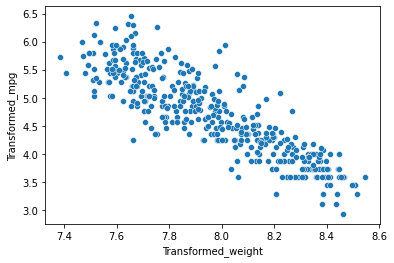

In [111]:
sns.scatterplot(x='Transformed_weight', y='Transformed_mpg', data=dataset)

### After feature scaling also weight is haveing inverse relation with mpg

In [112]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Transformed_mpg,isCylindersEven,Transformed_displacement,Imputed_horsepower,Transformed_weight
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,4.239069,1,2.735284,130.0,8.161660
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,3.871959,1,2.758346,165.0,8.214194
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,4.239069,1,2.741567,150.0,8.142063
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,4.000000,1,2.733519,150.0,8.141190
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,4.122173,1,2.732330,140.0,8.145840


### acceleration

Before Boxcox Transformation ==>  0.27877684462588986


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


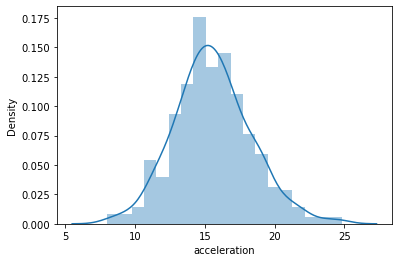

In [113]:
check_distribution('acceleration')

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

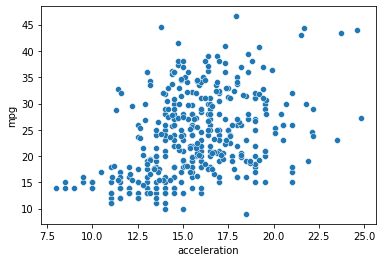

In [114]:
sns.scatterplot(x='acceleration', y='mpg', data=dataset)

<AxesSubplot:xlabel='acceleration', ylabel='Transformed_mpg'>

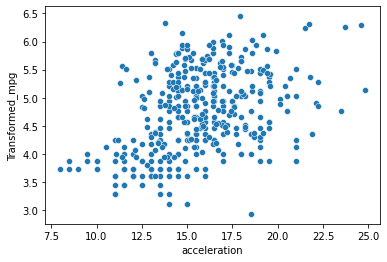

In [115]:
sns.scatterplot(x='acceleration', y='Transformed_mpg', data=dataset)

Before Boxcox Transformation ==>  0.27877684462588986


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


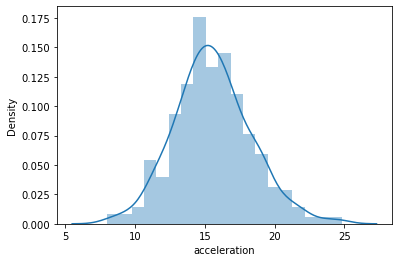

After Boxcox Transformation ==>  -0.09678231195492427


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


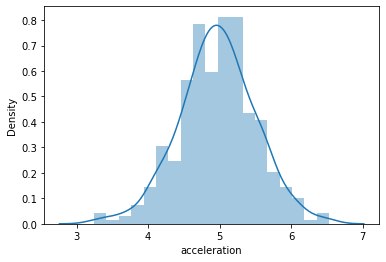

In [116]:
acceleration_boxcox_value = 0.4

apply_boxcox_transformation('acceleration', acceleration_boxcox_value)

In [117]:
dataset['Transformed_acceleration'] = boxcox(dataset['acceleration'], acceleration_boxcox_value)

dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Transformed_mpg,isCylindersEven,Transformed_displacement,Imputed_horsepower,Transformed_weight,Transformed_acceleration
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,4.239069,1,2.735284,130.0,8.161660,4.254800
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,3.871959,1,2.758346,165.0,8.214194,4.140781
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,4.239069,1,2.741567,150.0,8.142063,4.023747
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,4.000000,1,2.733519,150.0,8.141190,4.254800
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,4.122173,1,2.732330,140.0,8.145840,3.903475


### year Feature

<AxesSubplot:xlabel='model year', ylabel='count'>

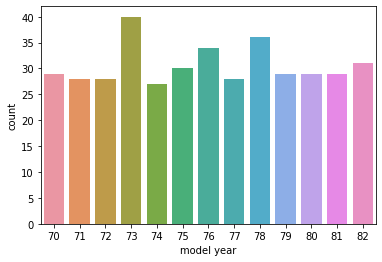

In [118]:
sns.countplot(x='model year', data=dataset)

### Group the Dataset with model year feature 

In [119]:
dataset.groupby('model year').median()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,Transformed_mpg,isCylindersEven,Transformed_displacement,Imputed_horsepower,Transformed_weight,Transformed_acceleration
model year,,,,,,,,,,,,,
70,16.00,8.0,307.0,150.0,3449.0,12.50,1.0,4.000000,1.0,2.735284,150.00,8.145840,4.366003
71,19.00,6.0,228.5,95.0,2798.0,14.50,1.0,4.351191,1.0,2.679853,94.25,7.934939,4.785967
72,18.50,4.0,131.0,104.5,2956.0,14.50,1.0,4.295130,1.0,2.560478,104.50,7.991562,4.785967
73,16.00,7.0,276.0,129.5,3338.5,14.00,1.0,4.000000,1.0,2.714803,129.50,8.113113,4.684412
74,24.00,4.0,122.0,88.0,2489.0,16.00,1.0,4.853455,1.0,2.544526,93.00,7.819636,5.078583
75,19.50,6.0,228.0,97.0,3098.5,16.00,1.0,4.405080,1.0,2.679431,97.00,8.038489,5.078583
76,21.00,6.0,184.0,93.5,3171.5,15.50,1.0,4.560959,1.0,2.634978,93.50,8.061937,4.982947
77,21.75,4.0,143.0,97.5,2747.5,15.65,1.0,4.638124,1.0,2.581165,97.50,7.918443,5.011747
78,20.70,5.5,159.5,97.0,2910.0,15.75,1.0,4.532015,1.0,2.605400,97.00,7.975730,5.030984


In [120]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Transformed_mpg,isCylindersEven,Transformed_displacement,Imputed_horsepower,Transformed_weight,Transformed_acceleration
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,4.239069,1,2.735284,130.0,8.161660,4.254800
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,3.871959,1,2.758346,165.0,8.214194,4.140781
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,4.239069,1,2.741567,150.0,8.142063,4.023747
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,4.000000,1,2.733519,150.0,8.141190,4.254800
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,4.122173,1,2.732330,140.0,8.145840,3.903475


### Origin 

<AxesSubplot:xlabel='origin', ylabel='count'>

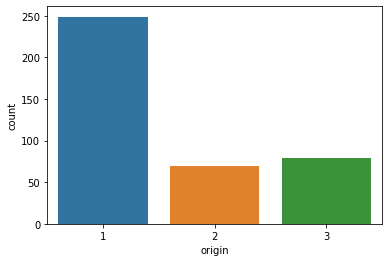

In [121]:
sns.countplot(x='origin', data=dataset)

In [122]:
dataset.groupby(['origin']).median()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Transformed_mpg,isCylindersEven,Transformed_displacement,Imputed_horsepower,Transformed_weight,Transformed_acceleration
origin,,,,,,,,,,,,,
1,18.5,6.0,250.0,105.0,3365.0,15.0,76.0,4.295698,1.0,2.697275,105.0,8.121183,4.885442
2,26.5,4.0,104.5,76.5,2240.0,15.7,76.0,5.075216,1.0,2.507018,77.5,7.714228,5.021421
3,31.6,4.0,97.0,75.0,2155.0,16.4,78.0,5.483786,1.0,2.488352,75.0,7.675546,5.153808


### We can see as origin rises mpg rises

### car name feature

In [123]:
dataset['car name'].nunique()

305

### Total no of car names are very high

In [124]:
dataset['car name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

### Brand Feature from Car Name Feature

In [125]:
dataset['brand name'] = dataset['car name'].apply(lambda x: x.split(' ')[0])

dataset['brand name'].nunique()

37

### Brand Names are 37 only 
### Coverting to Numerical

In [126]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder = LabelEncoder()

dataset['brand name numerical'] = encoder.fit_transform(dataset['brand name'])

dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,Transformed_mpg,isCylindersEven,Transformed_displacement,Imputed_horsepower,Transformed_weight,Transformed_acceleration,brand name,brand name numerical
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,4.239069,1,2.735284,130.0,8.161660,4.254800,chevrolet,7
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,3.871959,1,2.758346,165.0,8.214194,4.140781,buick,3
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,4.239069,1,2.741567,150.0,8.142063,4.023747,plymouth,25
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,4.000000,1,2.733519,150.0,8.141190,4.254800,amc,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,4.122173,1,2.732330,140.0,8.145840,3.903475,ford,13


### Correlation Matrix

<AxesSubplot:>

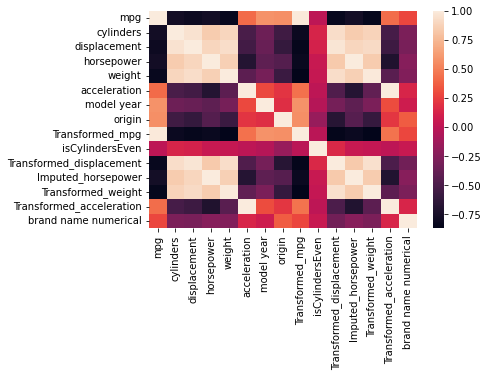

In [127]:
sns.heatmap(dataset.corr())

In [128]:
dataset.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Transformed_mpg,isCylindersEven,Transformed_displacement,Imputed_horsepower,Transformed_weight,Transformed_acceleration,brand name numerical
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450,0.990912,0.000740,-0.828192,-0.773453,-0.843979,0.429257,0.283746
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543,-0.816255,0.125828,0.929791,0.841284,0.882085,-0.523330,-0.278897
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409,-0.844299,0.115448,0.965254,0.895778,0.918805,-0.566746,-0.295731
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.819416,0.043738,0.836846,1.000000,0.845609,-0.709928,-0.234682
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024,-0.867517,0.042691,0.929884,0.862442,0.991420,-0.433712,-0.258764
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873,0.440561,0.000532,-0.480987,-0.686590,-0.401921,0.996644,0.136420
model year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662,0.578609,-0.035867,-0.314478,-0.413733,-0.284009,0.302119,0.076217
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000,0.561793,-0.166793,-0.678687,-0.452096,-0.604883,0.215522,0.362646
Transformed_mpg,0.990912,-0.816255,-0.844299,-0.819416,-0.867517,0.440561,0.578609,0.561793,1.000000,-0.008034,-0.851411,-0.815694,-0.869943,0.451949,0.279374
isCylindersEven,0.000740,0.125828,0.115448,0.043738,0.042691,0.000532,-0.035867,-0.166793,-0.008034,1.000000,0.147370,0.043125,0.032526,0.001207,0.045010


### Preparing Modelling Dataset

In [129]:
transformed_features = [
    'Transformed_mpg', 'cylinders', 'isCylindersEven', 'Transformed_displacement',
    'Imputed_horsepower', 'Transformed_weight', 'Transformed_acceleration',
    'model year', 'origin', 'brand name numerical'
]

transformed_features_modelling_dataset = dataset[transformed_features]

### Train Test Split Dataset

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_features_modelling_dataset.drop('Transformed_mpg', axis=1),
                                                    transformed_features_modelling_dataset['Transformed_mpg'], test_size=0.2, random_state=42)

In [131]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

### Model Evaluation

In [132]:
from sklearn.metrics import mean_squared_error

preds = reg.predict(X_test)

actual_preds = inv_boxcox(preds, mpg_boxcox_value)

actual_values = inv_boxcox(y_test, mpg_boxcox_value)

mse = mean_squared_error(actual_preds, actual_values)

print(f'Mean Square Error ==> {mse}')

Mean Square Error ==> 5.777109538500602


### Conclusion

### Used linear regression to predict mpg of cars.
### Many features in the dataset were highly skewed and to reduce their behaviour as outliers I scaled them.
### Finally used correlation matrix to identify the relationsips among the features.

### References

1. [Car Mpg Dataset](https://www.kaggle.com/uciml/autompg-dataset)
2. [Skewed Data Impact](https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37#:~:text=Effects%20of%20skewness&text=If%20there%20are%20too%20much,don't%20work%20but%20why.&text=So%20in%20skewed%20data%2C%20the,performance%20especially%20regression%2Dbased%20models.)
3. [Sklearn Python Package](https://scikit-learn.org/stable/index.html)